<a href="https://colab.research.google.com/github/HakureiPOI/Modeling_Allowance/blob/main/Flourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
sns.set_style("whitegrid")

In [17]:
fs = 300
t = np.linspace(0, 1, fs, endpoint=False)
freqs = [50, 120, 300]
signal = sum(np.sin(2 * np.pi * f * t) for f in freqs) + 1

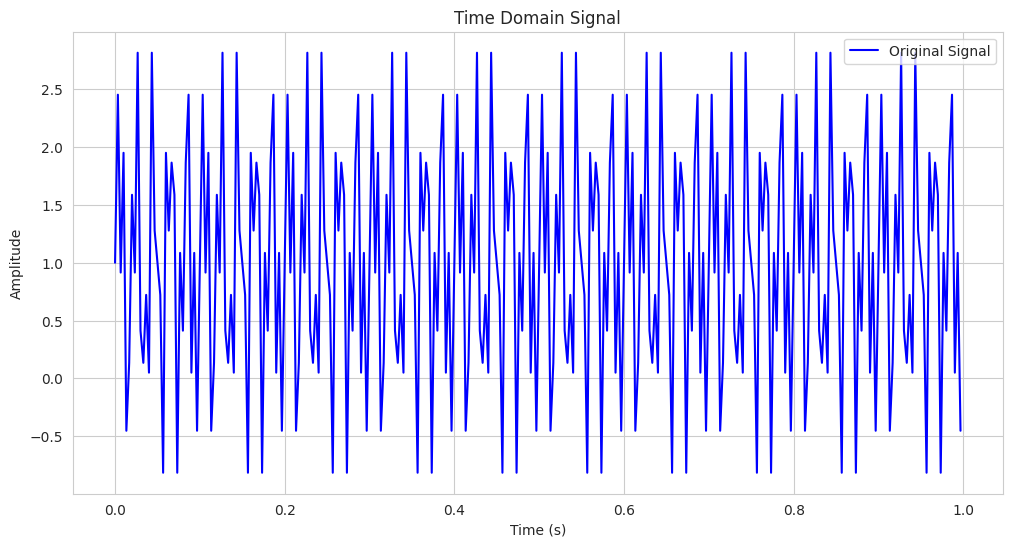

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(t, signal, label="Original Signal", color='blue')
plt.title("Time Domain Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

In [19]:
fft_origin = np.fft.fft(signal)
freq_origin = np.fft.fftfreq(len(signal), 1 / fs)
fft_origin_magnitude = np.abs(fft_origin) / len(signal)

Text(0, 0.5, 'Magnitude')

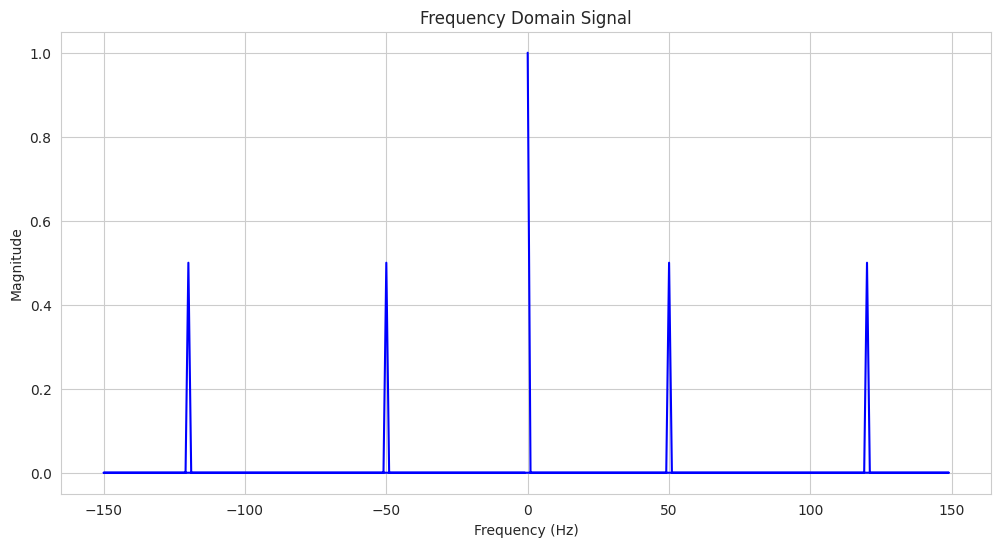

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(freq_origin, fft_origin_magnitude, label="Original Signal", color='blue')
plt.title("Frequency Domain Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

In [21]:
noise = np.random.normal(0, 0.3, len(signal))
noisy_signal = signal + noise

Text(0, 0.5, 'Amplitude')

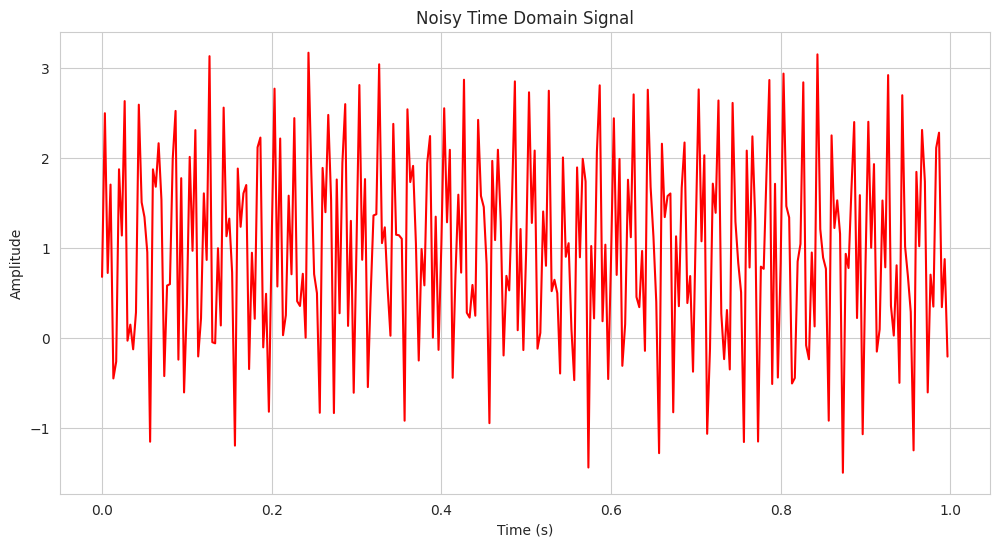

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(t, noisy_signal, label="Noisy Signal", color='red')
plt.title("Noisy Time Domain Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

In [23]:
fft_noise = np.fft.fft(noisy_signal)
freq_noise = np.fft.fftfreq(len(noisy_signal), 1 / fs)
fft_noise_magnitude = np.abs(fft_noise) / len(noisy_signal)

Text(0, 0.5, 'Magnitude')

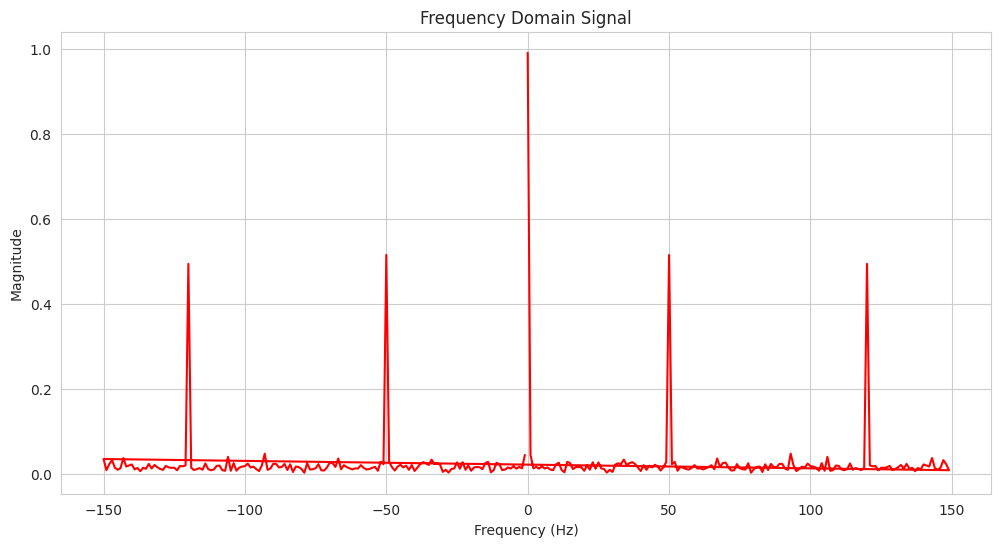

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(freq_noise, fft_noise_magnitude, label="Noisy Signal", color='red')
plt.title("Frequency Domain Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

In [25]:
reconstructed_signal = np.fft.ifft(fft_noise).real

Text(0, 0.5, 'Amplitude')

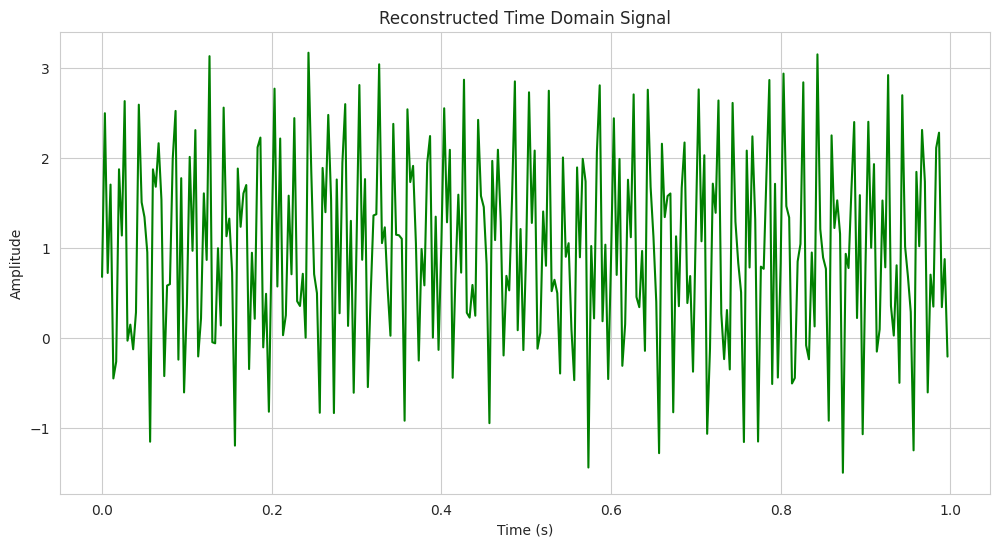

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(t, reconstructed_signal, label="Reconstructed Signal", color='green')
plt.title("Reconstructed Time Domain Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

In [27]:
threshold = 150  # 频率阈值（Hz）
filtered_fft = fft_noise.copy()
filtered_fft[np.abs(freq_noise) > threshold] = 0  # 去除高频分量

filtered_signal = np.fft.ifft(filtered_fft).real  # 转化为时域，并取实部

Text(0, 0.5, 'Amplitude')

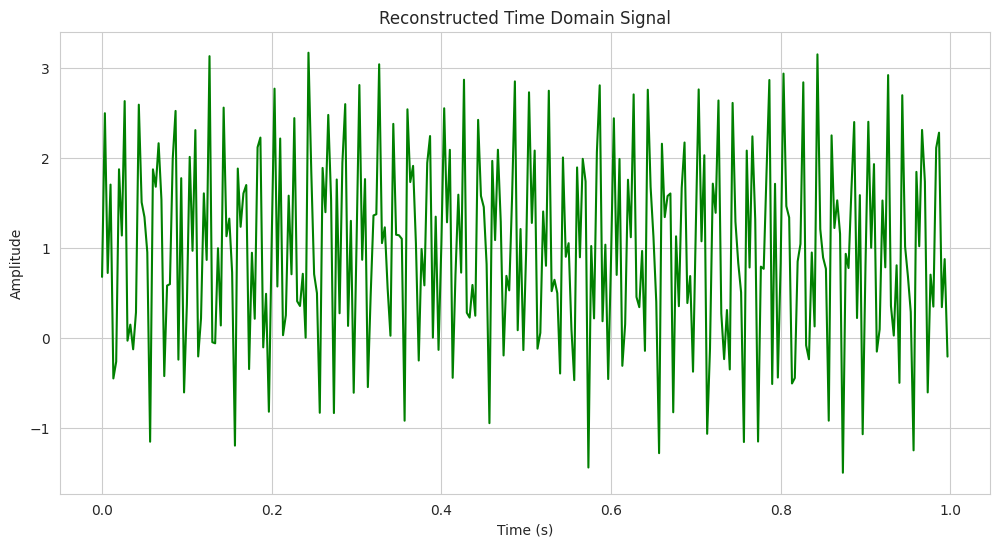

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(t, filtered_signal, label="Filtered Signal", color='green')
plt.title("Reconstructed Time Domain Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")